In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import os
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

In [2]:
DATA_DIR = '/kaggle/input/playground-series-s3e1/'

In [3]:
TRAIN_DATA = pd.read_csv(DATA_DIR+'train.csv', index_col='id')
TRAIN_DATA.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [4]:
TRAIN_DATA.shape

(37137, 9)

In [5]:
features = TRAIN_DATA.drop('MedHouseVal', axis=1)
label = TRAIN_DATA['MedHouseVal']

# Split data before doing any processing to avoid leakage

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2, random_state=42)

# Look out for missing values

In [7]:
X_train.isna().sum().sort_values(ascending=False)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

# Check data types to confirm it's all numerical(just in case)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29709 entries, 7714 to 15795
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      29709 non-null  float64
 1   HouseAge    29709 non-null  float64
 2   AveRooms    29709 non-null  float64
 3   AveBedrms   29709 non-null  float64
 4   Population  29709 non-null  float64
 5   AveOccup    29709 non-null  float64
 6   Latitude    29709 non-null  float64
 7   Longitude   29709 non-null  float64
dtypes: float64(8)
memory usage: 2.0 MB


In [9]:
y_train.describe()

count    29709.000000
mean         2.077812
std          1.156705
min          0.149990
25%          1.206000
50%          1.810000
75%          2.667000
max          5.000010
Name: MedHouseVal, dtype: float64

# Create a baseline model -> Linear Regression

['scaledLR']: -1.031575 (1.520954)
['scaledLR', 'scaledRigde1']: -1.031575 (1.520954)
['scaledLR', 'scaledRigde1', 'scaledRigde2']: -1.031579 (1.520967)


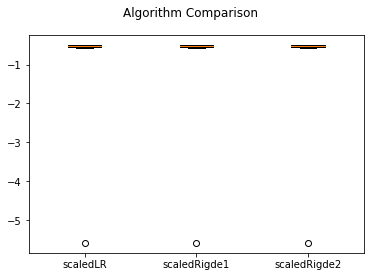

In [10]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LinearRegression())]))))
pipelines.append(('scaledRigde1' , (Pipeline([('scaled' , StandardScaler()),('R1' ,Ridge(alpha=0.01))]))))
pipelines.append(('scaledRigde2' , (Pipeline([('scaled' , StandardScaler()),('R2' ,Ridge(alpha=0.2))]))))

model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='neg_mean_squared_error')
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()